# Principal Component Analysis (PCA)

- Dimensionality Reduction is a technique that allows us to understand the independent variables and their variance thus helping to identify a minimum number of independent variables that has the highest variance with respect to the dependent variables.

- In simple terms, the dimensionality reduction technique helps us reduce the number of independent variables in a problem by identifying new and most effective ones.

- This technique is used as a dimentsionality reduction technique. Best for visualization: to pick 2 to 3 principal components.

## The following steps are taken by the PCA algorithm:-

1. Standardizing the dataset.
2. Calculating the covariance matrix for the features in the dataset.
3. Calculating the eigenvalues and eigenvectors for the covariance matrix.
4. Sorting eigenvalues and their corresponding eigenvectors.
5. Selecting K eigenvalues and form a matrix of eigenvectors.
6. Transforming the original matrix.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

### Step 1: Reading the data and defining the input-output features 



In [2]:
#importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Credit_Card.csv')

#checking the dataset variables
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
#checking the shape of the data
print('Shape of the dataset (No. of rows, No. of the columns):', df.shape)

Shape of the dataset (No. of rows, No. of the columns): (30000, 25)


Let’s see if there are any null values present in the dataset.



In [5]:
#checking the null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### From this section we have highlighted the imbalanced data

As we are dealing with the classification task, let's check the percentage distribution of each class of dependent variable. 

In [38]:
# Check the percentage distribution of each class 
df['default.payment.next.month'].value_counts(normalize=True)*100 

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

In [6]:
#defining the features
x=df.iloc[:,1:-1].values #input features
y=df.iloc[:,-1].values #output features

### Step 2: Applying PCA to extract optimal features

Before applying PCA we need to scale our data (Standardize the data) in order for all values to compare appropriately. So now we will perform a MinMax scaler to scale down all independent values within the range 0 to 1. 

In [7]:
#scaling the data

from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [8]:
#fitting PCA to analyise compnents

from sklearn.decomposition import PCA
pca= PCA(n_components=None)
pca.fit(x)

PCA()

In [9]:
#features stored based on eigenvalues

pca.explained_variance_

array([2.39921405e-01, 6.23298672e-02, 4.07593979e-02, 2.39375742e-02,
       1.66483704e-02, 1.42113781e-02, 9.28602578e-03, 7.87094875e-03,
       5.45234314e-03, 3.63128812e-03, 2.69052558e-03, 1.81099941e-03,
       1.34499878e-03, 1.09886467e-03, 1.00061702e-03, 5.97020005e-04,
       4.31000732e-04, 3.43514409e-04, 2.39650560e-04, 1.43196025e-04,
       1.08669361e-04, 7.41323540e-05, 3.79534566e-05])

In [10]:
#percentage contribution of each feature

pca.explained_variance_ratio_

array([5.52852843e-01, 1.43627219e-01, 9.39222117e-02, 5.51595468e-02,
       3.83629752e-02, 3.27473940e-02, 2.13978647e-02, 1.81370912e-02,
       1.25638786e-02, 8.36760671e-03, 6.19979995e-03, 4.17310065e-03,
       3.09929161e-03, 2.53212278e-03, 2.30572994e-03, 1.37571805e-03,
       9.93158489e-04, 7.91563044e-04, 5.52228734e-04, 3.29967764e-04,
       2.50407693e-04, 1.70823786e-04, 8.74564585e-05])

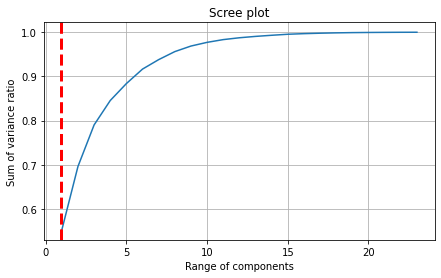

In [19]:
#variance Vs compnent plot

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,4))
plt.plot(range(1,24,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')

plt.axvline(np.cumsum(pca.explained_variance_ratio_).mean(), color='red', linestyle='dashed', linewidth=3)

From the above plot, we can choose the optimal component to be 11 which explains around 98% variance (means contains 98% information from the original dataset). 

Now let’s newly fit the PCA with n_components to be 11. 

In [20]:
#choosing the optimal component to be 11 as per the plot. 11 components are addressing 98% of the variance

pca= PCA(n_components=11)
pca.fit(x)

PCA(n_components=11)

After this process, we will check the cumulative sum of variances addressed by these 11 features:

In [21]:
pca.explained_variance_ratio_.cumsum()

array([0.55285284, 0.69648006, 0.79040227, 0.84556182, 0.8839248 ,
       0.91667219, 0.93807005, 0.95620715, 0.96877102, 0.97713863,
       0.98333843])

In [22]:
#creating training & test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pca.transform(x),y,random_state=0, test_size=0.2)

#checking the shapes of the newly created train, test patterns
#creating the training & test sets:

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24000, 11), (24000,), (6000, 11), (6000,))

### Step 3: Balancing using SMOTE

- importing the imbalanced-learn library to use SMOTE technique.
!pip install imbalanced-learn

In [24]:
#counting the labels before resampling

print('Before SMOTE, counts of label "1": {}'.format(sum(y_train == 1)))
print('After SMOTE, counts of label "0": {}'.format(sum(y_train == 0)))

Before SMOTE, counts of label "1": 5339
After SMOTE, counts of label "0": 18661


As we can see there is a huge difference between the classes. 

Now let’s balance these classes. 

In [30]:
# Using SMOTE resampling for balancing the class labels
from imblearn.over_sampling import SMOTE

smt = SMOTE(k_neighbors=5, random_state=42)

x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

print('After SMOTE, the shape of train_X: {}'.format(x_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res == 0)))

After SMOTE, the shape of train_X: (37322, 11)
After SMOTE, the shape of train_y: (37322,) 

After SMOTE, counts of label '1': 18661
After SMOTE, counts of label '0': 18661


### Step 4: Train and evaluate the classifier 



In [31]:
# Defining the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [33]:
# Training the logistic regression model
model.fit(x_train_res, y_train_res)

# Let’s obtain the prediction on the test dataset.
# Making predictions with the trained model
y_pred = model.predict(x_test)

In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3320, 1383],
       [ 471,  826]])

As we can see from the above confusion matrix, a total of 3320+826= 4146 are correctly predicted and 1383 + 471 = 1854  are incorrectly predicted. 

Let’s see how the model is accurate on the test dataset.

In [35]:
# Test accuracy
model.score(x_test,y_test)

0.691

In [36]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      4703
           1       0.37      0.64      0.47      1297

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000



As we can see from the above classification report the model is well evaluated on the metrics and given a decent performance. 

So this is how we can perform PCA and incorporate it into the model pipeline.  